# prepare data for testing regression model

In [ ]:
# breast cancer data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

X_test=data.data
y_test= data.target


In [ ]:
X_test.shape

(569, 30)

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
# 
X_test, y_test = make_classification(n_samples=150, n_features=5, n_informative=3, n_redundant=0, n_repeated=0, n_classes=2)
y_test

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
import numpy as np
import torch
X_test = torch.from_numpy(X_test.astype(np.float32))
X_test.shape

y_test = torch.from_numpy(y_test.reshape(569,1).astype(np.float32))
y_test.shape

torch.Size([569, 1])

In [ ]:
X_test.shape

torch.Size([150, 5])

# make model using pytorch

In [ ]:
import torch
import torch.nn as nn

# define logistic regression  model
n_input, n_out, batch_size, learning_rate = 30, 1, 100, 0.01

model = nn.Sequential(
                    nn.Linear(n_input, 30),
                    nn.Sigmoid(),
                    nn.Linear(30,1),
                    nn.Sigmoid())


# define loss function and optimzer on how to upgrade the gradient
loss_function = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# actual training is happening
losses = []
for epoch in range(15000):
    y_pred = model(X_test[:,:])
    loss = loss_function(y_pred, y_test)
    losses.append(loss.item())

    model.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
y_test.shape

torch.Size([569, 1])

# check what we get after training

In [ ]:
# weight and bias (w,b)
for name, param in model.named_parameters():
    print(name, param)

0.weight Parameter containing:
tensor([[-4.1612e-02, -1.9122e-02,  4.4152e-02,  7.0479e-02,  2.2417e-02,
         -1.6561e-01,  1.5120e-01,  2.9400e-02, -1.1075e-01,  5.4925e-02,
          3.8442e-02,  7.0030e-02,  1.2126e-01,  1.3367e-01, -1.7580e-01,
         -1.6519e-02,  4.6906e-02, -1.2709e-01,  1.5099e-01, -8.4105e-03,
         -1.3516e-01, -2.4868e-02, -3.7034e-02, -1.4642e-01,  5.8704e-02,
         -6.1468e-02,  1.6973e-01,  8.5758e-02,  8.2577e-02, -6.3986e-02],
        [-5.7281e-02,  2.1172e-02,  1.1051e-01,  5.8800e-02, -1.8071e-01,
         -1.0173e-01,  1.1503e-01,  1.5468e-01, -1.1649e-01, -3.1738e-02,
         -1.2062e-01,  1.2433e-02,  1.2609e-01, -2.2433e-02,  1.1227e-01,
         -3.6519e-02,  8.3121e-02, -9.0449e-02, -8.7953e-02,  6.3030e-02,
         -3.6851e-02,  8.9514e-02, -4.6134e-02,  3.5066e-02,  4.9943e-03,
          1.2447e-01, -1.8029e-01, -1.3697e-01,  1.7214e-01,  1.6604e-01],
        [-7.1516e-02,  1.6431e-01, -1.5627e-01,  1.5186e-01,  1.7218e-01,
     

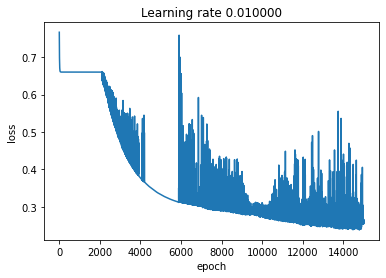

In [ ]:
# visualize the loss during each epoch
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

# validate model

In [ ]:
X_val, y_val = X_test[100:,:], y_test[100:, :]


In [ ]:
y_pred =model(X_val)

In [ ]:
y_pred =y_pred.detach().numpy().reshape(469)

In [ ]:
y_pred =[0 if i<0.5 else 1 for i in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred)

0.9360341151385928